# Cat and Dog Classification using SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from skimage.io import imread
from skimage.transform import resize

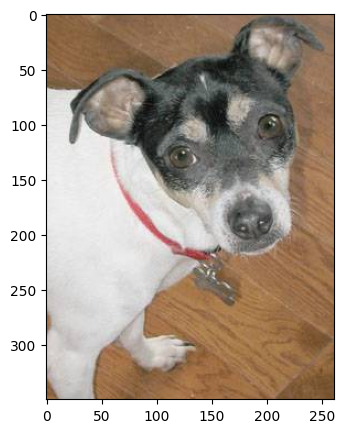

In [2]:
plt.figure(figsize=(10,5))
img1 = r"C:\Users\Ishwari\Downloads\test_set\test_set\dogs\dog.4450.jpg"
plt.imshow(imread(img1))

In [3]:
img_path = r"C:\Users\Ishwari\Downloads\test_set\test_set\dogs\dog.5000.jpg"
img = imread(img_path)
img

array([[[238, 238, 238],
        [238, 238, 238],
        [237, 237, 237],
        ...,
        [ 86,  88,  87],
        [ 93,  95,  94],
        [ 99, 101, 100]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [ 88,  92,  91],
        [ 94,  96,  95],
        [ 97, 101, 100]],

       [[237, 237, 237],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [ 88,  94,  94],
        [ 91,  95,  96],
        [ 92,  98,  98]],

       ...,

       [[210, 211, 195],
        [218, 219, 203],
        [226, 227, 211],
        ...,
        [ 24,  24,  22],
        [ 24,  24,  22],
        [ 24,  24,  22]],

       [[191, 192, 176],
        [204, 205, 189],
        [222, 223, 207],
        ...,
        [ 22,  22,  20],
        [ 22,  22,  20],
        [ 22,  22,  20]],

       [[205, 206, 190],
        [209, 210, 194],
        [221, 222, 206],
        ...,
        [ 21,  21,  19],
        [ 21,  21,  19],
        [ 21,  21,  19]]

In [4]:
img.shape

(374, 500, 3)

In [5]:
img_resize = resize(img, (15,15))
img_resize.shape

(15, 15, 3)

In [6]:
img_resize

array([[[0.95148604, 0.95150613, 0.94981646],
        [0.96445897, 0.96447999, 0.96265169],
        [0.93718755, 0.9387964 , 0.93794391],
        [0.914667  , 0.92144834, 0.91994838],
        [0.8809077 , 0.893558  , 0.90431226],
        [0.82844679, 0.85290029, 0.87368266],
        [0.77726587, 0.8130583 , 0.83483774],
        [0.72620505, 0.76862259, 0.80221388],
        [0.69391   , 0.74234499, 0.78378028],
        [0.71254936, 0.75758365, 0.79629072],
        [0.72624991, 0.76494081, 0.79484992],
        [0.68605202, 0.72460999, 0.74871624],
        [0.67865503, 0.70100371, 0.71034298],
        [0.56377524, 0.58747138, 0.60309444],
        [0.41054166, 0.44750898, 0.47719679]],

       [[0.92928518, 0.93196121, 0.9316455 ],
        [0.94736534, 0.9487264 , 0.94935003],
        [0.95121107, 0.95198062, 0.95189691],
        [0.93598793, 0.93845834, 0.93735105],
        [0.9113037 , 0.91671002, 0.91862888],
        [0.83193092, 0.84660016, 0.8543687 ],
        [0.77222741, 0.79930397,

In [7]:
flatten_img = img_resize.flatten()
flatten_img

array([0.95148604, 0.95150613, 0.94981646, 0.96445897, 0.96447999,
       0.96265169, 0.93718755, 0.9387964 , 0.93794391, 0.914667  ,
       0.92144834, 0.91994838, 0.8809077 , 0.893558  , 0.90431226,
       0.82844679, 0.85290029, 0.87368266, 0.77726587, 0.8130583 ,
       0.83483774, 0.72620505, 0.76862259, 0.80221388, 0.69391   ,
       0.74234499, 0.78378028, 0.71254936, 0.75758365, 0.79629072,
       0.72624991, 0.76494081, 0.79484992, 0.68605202, 0.72460999,
       0.74871624, 0.67865503, 0.70100371, 0.71034298, 0.56377524,
       0.58747138, 0.60309444, 0.41054166, 0.44750898, 0.47719679,
       0.92928518, 0.93196121, 0.9316455 , 0.94736534, 0.9487264 ,
       0.94935003, 0.95121107, 0.95198062, 0.95189691, 0.93598793,
       0.93845834, 0.93735105, 0.9113037 , 0.91671002, 0.91862888,
       0.83193092, 0.84660016, 0.8543687 , 0.77222741, 0.79930397,
       0.81486541, 0.74548059, 0.78683733, 0.81807538, 0.68482838,
       0.74208559, 0.79000049, 0.63625723, 0.70686956, 0.76972

In [8]:
flatten_img.shape

(675,)

In [9]:
input_dir = r"C:\Users\Ishwari\Downloads\test_set\test_set"
categories = ['cats', 'dogs']
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img, (15,15))
        data.append(img.flatten())
        labels.append(category_idx)    

C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4001.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4002.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4003.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4004.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4005.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4006.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4007.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4008.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4009.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4010.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4011.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4012.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4013.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4014.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4015.jpg
C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4

In [10]:
data[1]

array([0.49455332, 0.47327465, 0.41579835, 0.45960165, 0.43884834,
       0.38972562, 0.41084784, 0.39092072, 0.34617174, 0.3628795 ,
       0.34705993, 0.29736049, 0.33822314, 0.32095534, 0.26825516,
       0.31766447, 0.29872341, 0.2486088 , 0.34199951, 0.30726556,
       0.23351812, 0.32740655, 0.29093812, 0.21316026, 0.36551905,
       0.30683014, 0.19713855, 0.39916555, 0.31345704, 0.20236217,
       0.28833835, 0.17949345, 0.1104213 , 0.25334435, 0.11283439,
       0.06173506, 0.31074502, 0.12356083, 0.06305852, 0.38028219,
       0.14828401, 0.06444084, 0.43458703, 0.17870038, 0.07178485,
       0.45322278, 0.4360103 , 0.39156084, 0.3172875 , 0.29101513,
       0.24941391, 0.33613407, 0.30697625, 0.26116193, 0.33128587,
       0.28081434, 0.22738559, 0.30031112, 0.22825628, 0.1657873 ,
       0.29802613, 0.22460842, 0.16432392, 0.31045938, 0.2362979 ,
       0.1713315 , 0.31252053, 0.24393091, 0.17853141, 0.32775265,
       0.2300237 , 0.15846611, 0.35289422, 0.1910449 , 0.10535

In [11]:
labels[1]

0

In [12]:
data = np.asarray(data)
labels = np.asarray(labels)

In [13]:
data

array([[0.46717939, 0.58898388, 0.64124616, ..., 0.51179056, 0.57388877,
        0.6087126 ],
       [0.49455332, 0.47327465, 0.41579835, ..., 0.40116611, 0.17388368,
        0.07268538],
       [0.19569579, 0.17964409, 0.14638953, ..., 0.57304762, 0.50764377,
        0.48233354],
       ...,
       [0.47520526, 0.40143693, 0.33460227, ..., 0.50796179, 0.45401545,
        0.39586824],
       [0.54860723, 0.54893046, 0.54503866, ..., 0.59786659, 0.62639173,
        0.60671373],
       [0.95148604, 0.95150613, 0.94981646, ..., 0.10356239, 0.10356728,
        0.09573501]])

In [14]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# Built SVM Model for classification

In [17]:
from sklearn.svm import SVC
svm_model = SVC()

### Model Training

In [18]:
svm_model.fit(x_train, y_train)

SVC()

In [19]:
y_pred = svm_model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,

In [20]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.6567901234567901

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(svm_model, data, labels, cv = 5)
cross_val_score

array([0.58518519, 0.60987654, 0.64444444, 0.66336634, 0.64356436])

In [22]:
Mean_Accuracy = cross_val_score.mean()
Mean_Accuracy

0.6292873731817626

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       202
           1       0.65      0.69      0.67       203

    accuracy                           0.66       405
   macro avg       0.66      0.66      0.66       405
weighted avg       0.66      0.66      0.66       405



In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
classifer = SVC()
parameters = [{'gamma':[0.01, 0.001, 0.0001], 'C':[10, 100, 1000]}]
grid_search = GridSearchCV(classifer, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [26]:
best_estimator = grid_search.best_estimator_
best_estimator

SVC(C=10, gamma=0.01)

In [27]:
y_prediction = best_estimator.predict(x_test)
y_prediction

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

# Classify the Image

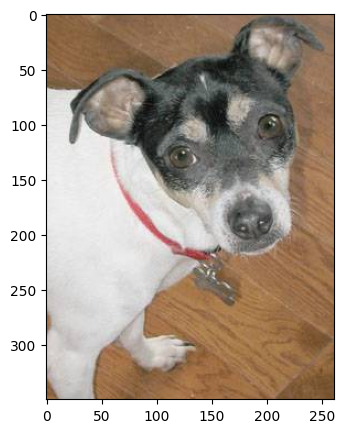

In [28]:
plt.figure(figsize=(10, 5))
img_path = r"C:\Users\Ishwari\Downloads\test_set\test_set\dogs\dog.5000.jpg"
plt.imshow(imread(img1))

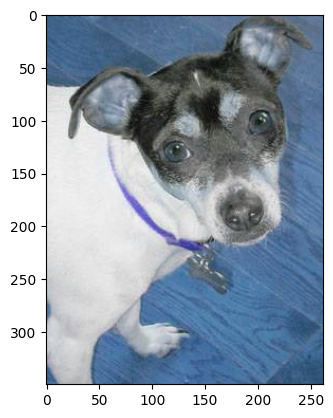

In [29]:
import cv2 as cv
img_path = cv.imread(img1)
plt.imshow(img_path)

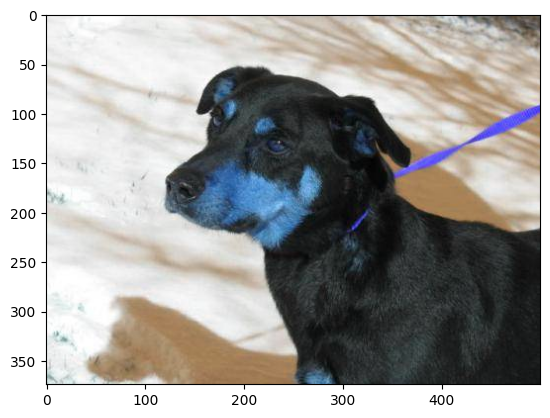

In [30]:
img_dog = r"C:\Users\Ishwari\Downloads\test_set\test_set\dogs\dog.5000.jpg"
img_path = cv.imread(img_dog)
plt.imshow(img_path)

In [31]:
img_dog = r"C:\Users\Ishwari\Downloads\test_set\test_set\dogs\dog.5000.jpg"
img_new = imread(img_dog)
img_new1 = resize(img_new, (15,15))
img_flatten = img_new1.flatten()
img_array = np.asarray(img_flatten)

result = svm_model.predict(img_array.reshape(1, -1))

if result[0] == 1:
    print("Result =", result[0])
    print("It is a cat.")
else:
    print("It is a dog.")

Result = 1
It is a cat.


In [32]:
def image_classification_prediction(image):
    img_new = imread(image)
    img_new1 = resize(img_new, (15,15))
    img_flatten = img_new1.flatten()
    img_array = np.asarray(img_flatten)
    result = svm_model.predict(img_array.reshape(1, -1))
    img_path = cv.imread(image)
    plt.imshow(img_path)
    if result[0] == 1:
        print("Result =", result[0])
        return "It is a dog"
    else:
        return "IT is a cat"
        

Result = 1


'It is a dog'

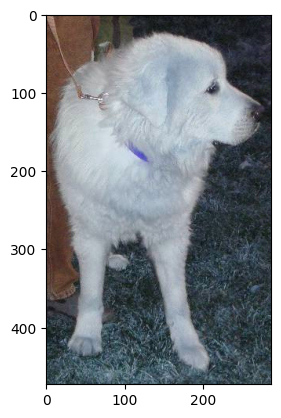

In [33]:
img2 = r"C:\Users\Ishwari\Downloads\test_set\test_set\dogs\dog.4600.jpg"
image_classification_prediction(img2)

Result = 1


'It is a dog'

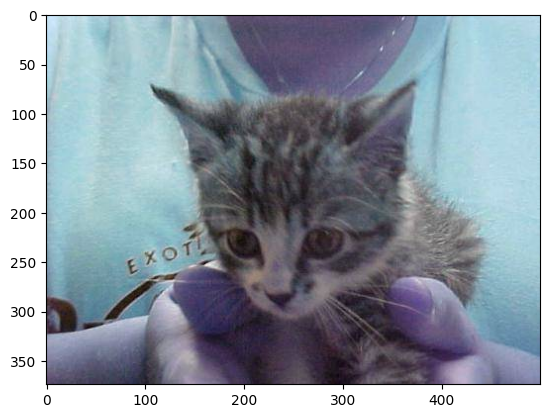

In [36]:
img3 = r"C:\Users\Ishwari\Downloads\test_set\test_set\cats\cat.4700.jpg"
image_classification_prediction(img3)